In [104]:
import numpy as np 
import pywt
import scipy.signal 
from scipy.signal import convolve2d
from scipy.misc import (imshow, imread)
from matplotlib.gridspec import GridSpec

%matplotlib inline

%run helpers.py

### Run code below to load needed files

for name in ['Barb', 'Bird', 'Boat', 'Bridge', 'Crosses',\
 'Goldhill','Horiz','Lena','Mandrill','Peppers','Slope',\
 'Squares','Text','Washsat','Zelda']:
  !wget http://www.math.uni.wroc.pl/~mpal/academic/2012/Datasets/{name}.gif

!mkdir data
!mv *.gif data 

## Darken/lighten

In [105]:
lena = imread('data/Lena.gif')
lena_lighter = (lena.astype(np.double) * 1.3).clip(0, 255)
lena_darker = (lena.astype(np.double) / 1.3).clip(0, 255)

lenas = [lena_lighter, lena, lena_darker]

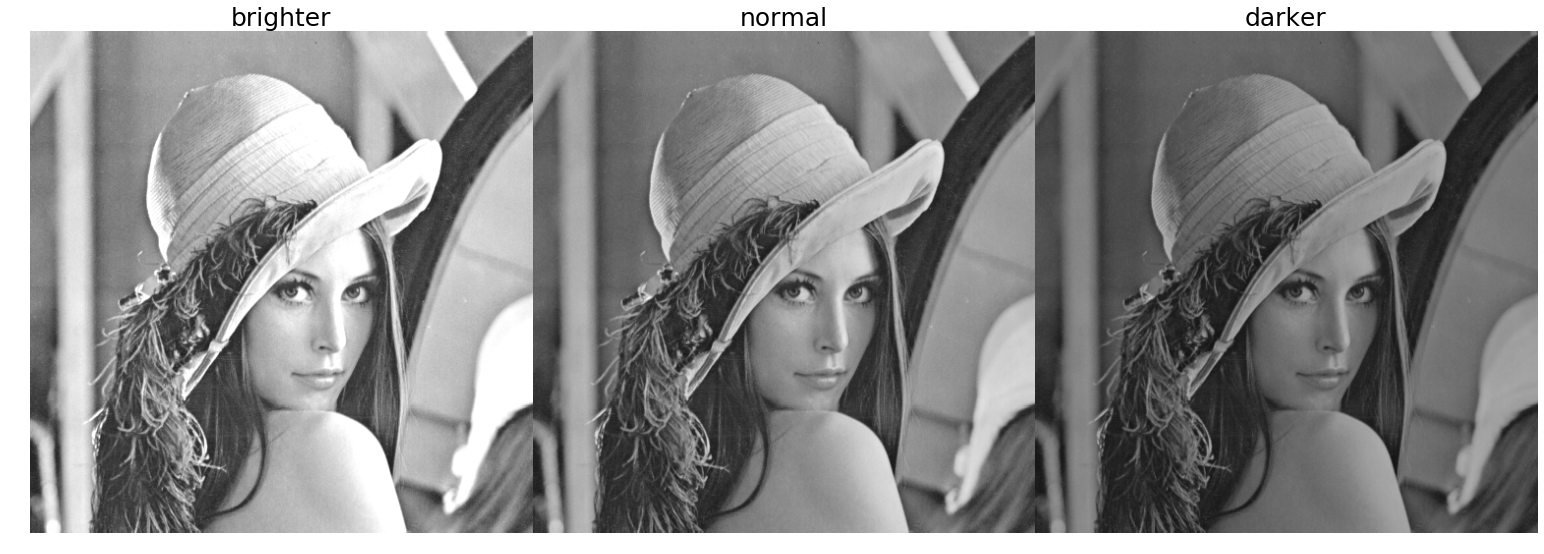

In [106]:
plt.figure(figsize=(27,9))
plot_linear_layout(lenas, titles = ['brighter', 'normal', 'darker'])

plt.show()

## Wavelets

In [107]:
w = pywt.Wavelet('sym3')
(cA, (cH, cV, cD)) = pywt.dwt2(lena, wavelet=w, mode='periodization')

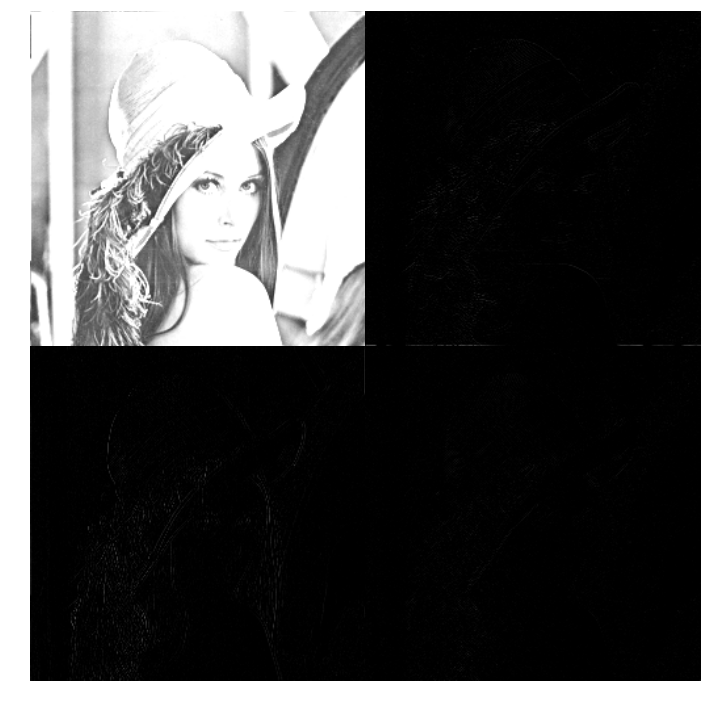

In [108]:
imgs = [cA, cH, cV, cD]

plt.figure(figsize=(12,12))
plot_rectangular_layout(imgs)

## Contrast

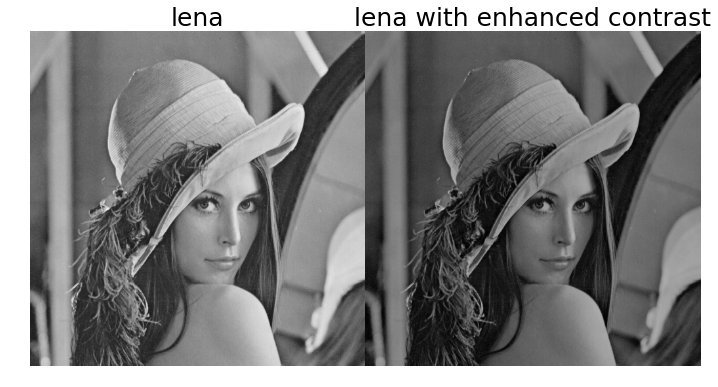

In [109]:
lena_min = lena.min() 
lena_max = lena.max()
c = 255 / (lena_max - lena_min)

plt.figure(figsize=(12,6))
plot_linear_layout([lena, (lena - lena_min) / c], ['lena', 'lena with enhanced contrast'])

## Noise

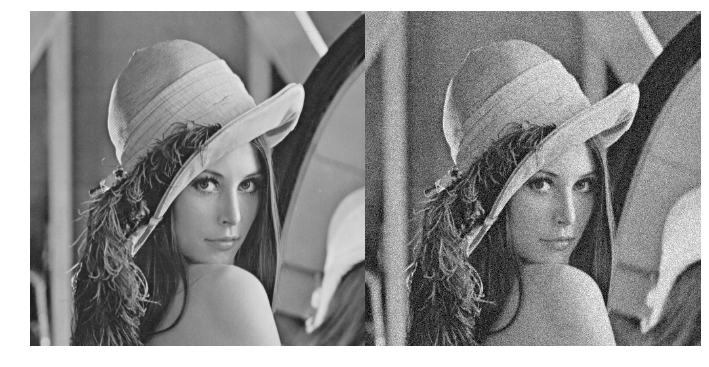

In [110]:
noise = 20 * np.random.randn(*lena.shape)
lena_noisy = lena + noise

plt.figure(figsize=(12,6))
plot_linear_layout([lena, lena_noisy])

## Blur / smoothing

In [111]:
from scipy.ndimage.filters import gaussian_filter

blurred = gaussian_filter(lena, sigma = 1)

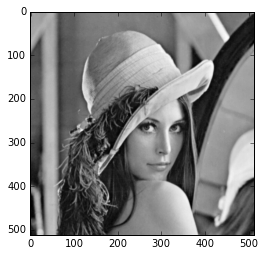

In [112]:
plt.imshow(blurred, cmap = 'gray')

In [113]:
mask = np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])
mask = mask / mask.sum()

lena_smoothed = convolve2d(lena, mask)

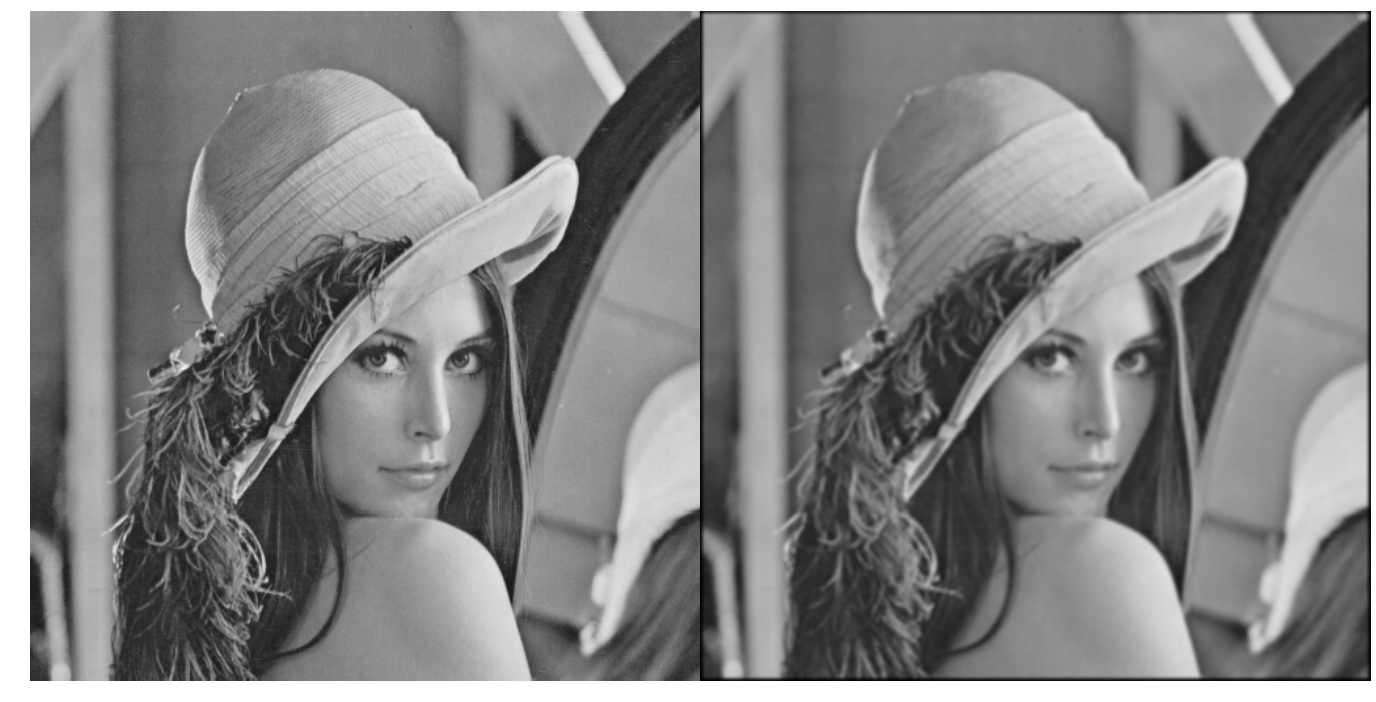

In [114]:
plt.figure(figsize=(24,12))
plot_linear_layout([lena, lena_smoothed])

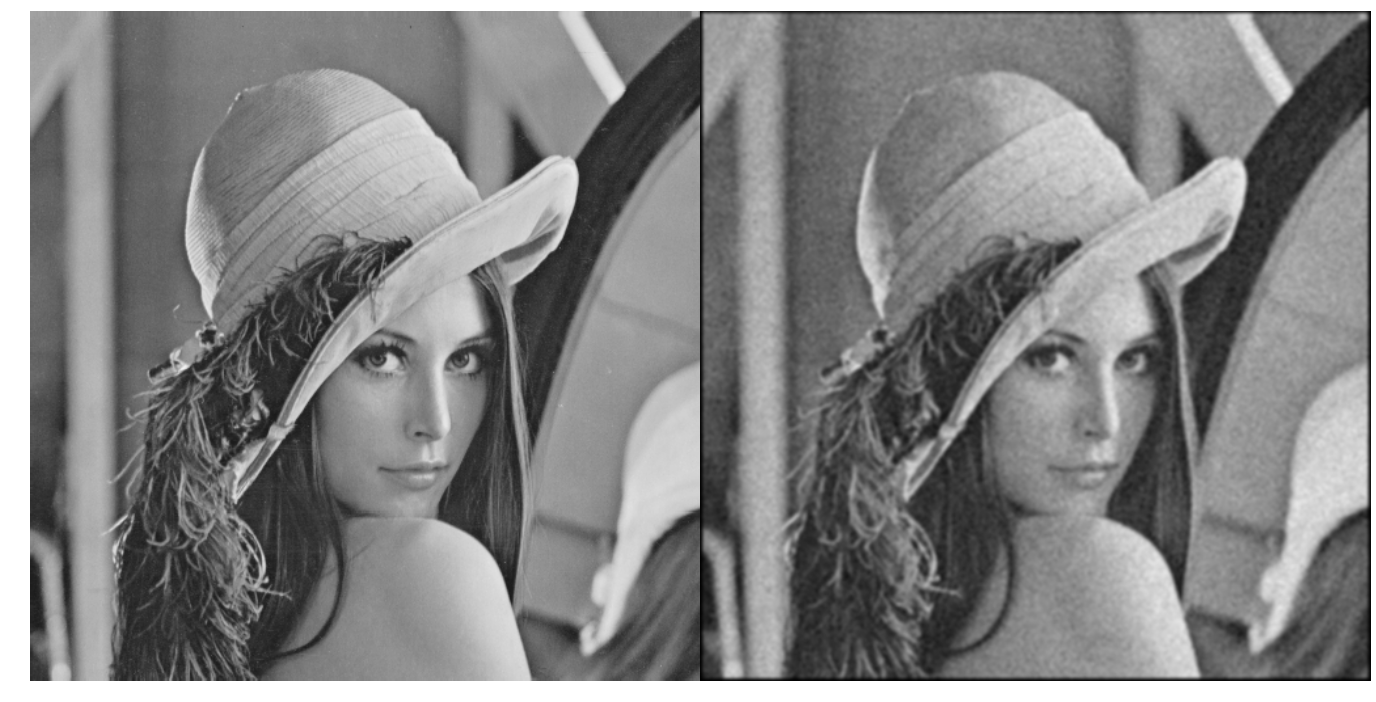

In [115]:
plt.figure(figsize=(24,12))
plot_linear_layout([lena, convolve2d(lena_noisy,mask) ])

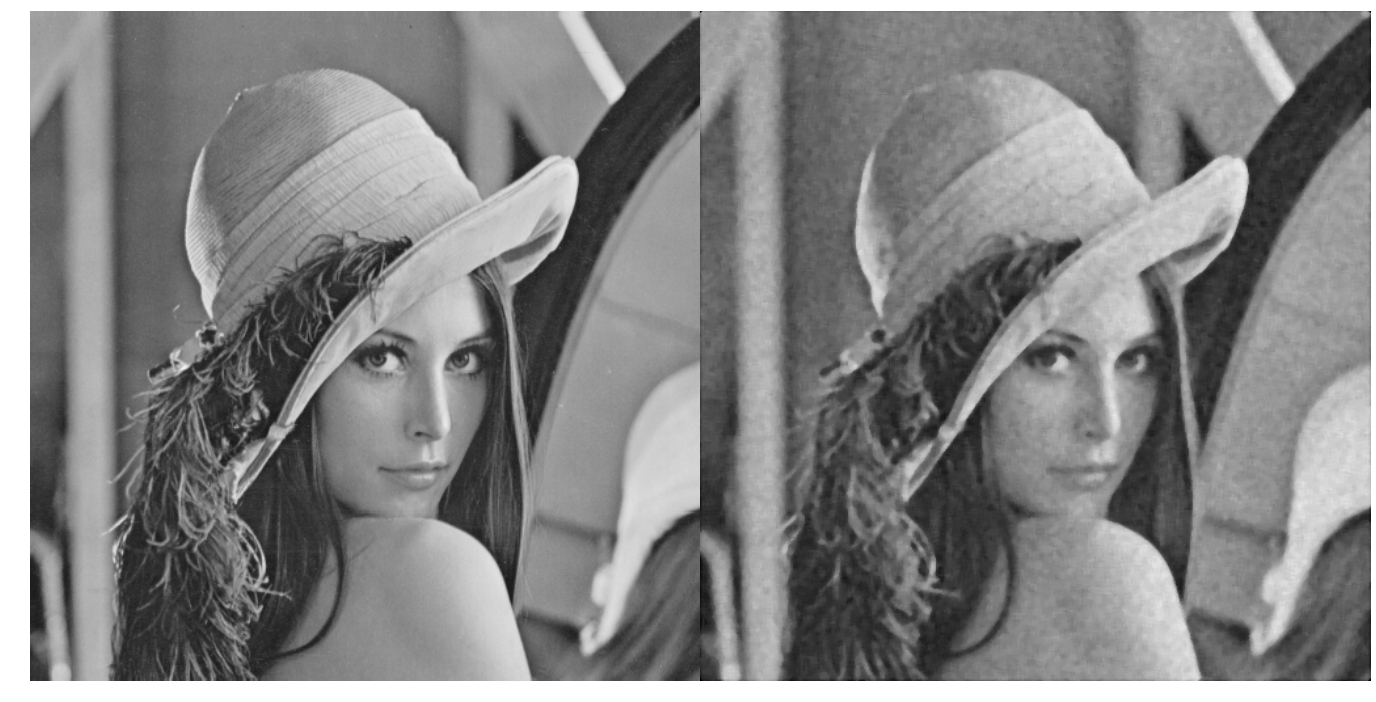

In [116]:
plt.figure(figsize=(24,12))
plot_linear_layout([lena, scipy.signal.medfilt2d(lena_noisy, kernel_size=5) ])

## Square

In [117]:
square = 170 * np.ones((512, 512))
square[171: 341, 171: 341] = 85
square += 10 * np.random.randn(512, 512)

square_smoothed = convolve2d(square, mask)

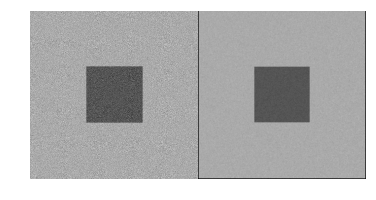

In [121]:
plt.figure(figsize=(18,9))
plot_linear_layout([square, square_smoothed])

## Own median filter

In [119]:
def my_median_filter(img, kernel_size = 3):
  new_img = np.zeros(img.shape)
  n, m = img.shape
  th = kernel_size // 2
  for i in range(th + 1, n - th):
    for j in range(th + 1, m - th):
      med = np.median(img[i - th:i + th, j - th: j + th])
      new_img[i, j] = med
  return new_img

square_median_filtered = my_median_filter(square)

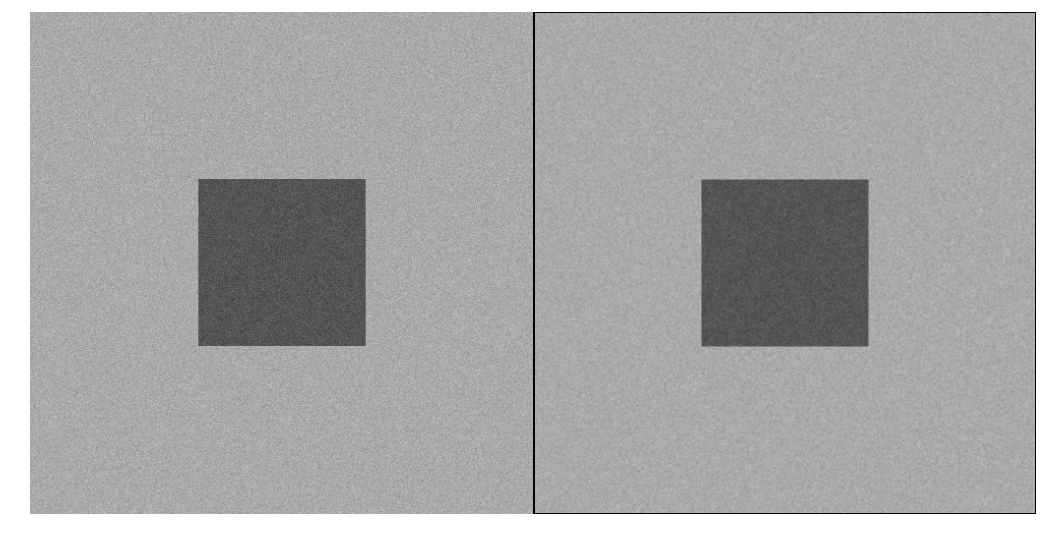

In [120]:
plt.figure(figsize=(18,9))
plot_linear_layout([square, square_median_filtered])